<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI285 - Computación Científica I / INF285 - Computación Científica</h1>
    <h1> Tarea 1: Remember your roots </h1>
    <h3> [S]cientific [C]omputing [T]eam 2019</h3>
</center>
<p>
<center>Marzo 2019 - v1.25 </center>
</p>

---

## Contexto

La presente tarea tiene como objetivo el uso de algoritmos de búsquedas de ceros en 1D, como adaptarlos a un problema particular y que implicancias tiene el uso de cada uno, tanto desde el punto de vista de la aproximación de la solución como de la computación necesaria. Al final se presenta la interpretación gráfica de las soluciones obtenidas.

_Nota: En esta tarea no se puede utilizar ```sympy``` en los algoritmos numéricos, pero sí se puede utilizar para desarrollos intermedios, por ejemplo en la sección "1.- Construcción"._

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
import ipywidgets as widgets




import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
%matplotlib inline
from ipywidgets import interact
sym.init_printing()
from scipy import optimize

import math

-------

## Problema

El universo de Marvel fue atacado duramente por Thanos en _Avenger Infinity War_. 
Sin embargo, los Avengers en conjunto con la Capitana Marvel tienen un plan para salvar al universo.
Lamentablemente, se han encontrado con la siguiente ecuación diferencial ordinaria que no pueden resolver:

\begin{align*}
\frac{dy}{dx}(x)&=y(x)\cos{(x+y(x))},\\
y(0)&=1,
\end{align*}

donde $x \in [0,100]$ y además sabemos que $-1000\leq y(x) \leq 1000$ para $x \in [0,100]$.
Afortunadamente, usted se ha dado cuenta que puede usar algoritmos numéricos para encontrar una aproximación numérica de $y(x)$ sobre una grilla de puntos $x_i=100\frac{i}{M}$, con $i\in\{0,1,\dots,M\}$.
Una estrategia para resolver este tipo de problemas es discretizar el dominio de la función, y en lugar de encontrar la función $y(x)$ algebraicamente, se encuentra una aproximación a $y(x_i)$ para cada $x_i$.

Note que ya conocemos el valor exacto de $y(x_0)=y(0)=1$ por la condición inicial, por lo que necesitamos obtener el siguiente valor $y(x_1)$ y así sucesivamente hasta $y(x_M)$.
Para hacer esto, primero hagamos un poco de desarrollo algebraico. 
Al integrar la ecuación diferencial entre $x_0$ y $x_1$ obtenemos:

\begin{equation*}
\int_{x_0}^{x_1} \dfrac{dy}{dx}(x) \, \mathrm{d}x  =  \int_{x_0}^{x_1} y(x)\,\cos{(x+y(x))} \, \mathrm{d}x.
\end{equation*}

Por el **teorema fundamental del cálculo**, esto es:

\begin{equation*}
 y(x_1)- y(x_0)   =  \int_{x_0}^{x_1} \! y(x)\cos{(x+y(x))} \, \mathrm{d}x.
\end{equation*}

Hasta este punto no se ha realizado ninguna aproximación.
Nótese que $y(x_1)$ es lo que buscamos y $y(x_0)$ es conocido, asi que vamos bien encaminados. 
Sin embargo necesitamos $y(x)$ para realizar la integral del lado derecho de la ecuación.
Entonces, ahora es un buen momento para realizar una aproximación numérica.
En este caso, utilizaremos el método de integración de trapecio.
Este consiste en que una integral definida $\int_a^b\,f(x)\,\mathrm{d}x$ es obtenida por medio de la siguiente expresión $\dfrac{f(a)+f(b)}{2}(b-a)+\text{Error}$, i.e. $\int_a^b\,f(x)\,\mathrm{d}x\approx\dfrac{f(a)+f(b)}{2}(b-a)$.
En la siguiente figura se muestra un sketch de la aproximación:

<img src="Trapezoidal-Rule.png" style="width:50%">

donde la función a integrar es la curva en rojo, el valor de la integral, en este caso, corresponde al área bajo la curva en gris, la aproximación de la integral $\int_a^b\,f(x)\,\mathrm{d}x$ por medio de un trapecio es la área achurada en celeste y el Error es la diferencia entre en valor de la integral y la aproximación por trapecio. 
Por ahora solo es necesario entender que el Error _debería_ disminuir a medida que el largo del intervalo $[a,b]$ sea más pequeño. Entonces, en nuestro caso esto se reduce a:

\begin{equation*}
 y(x_1)- y(x_0)   \approx  \dfrac{x_1-x_0}{2}\left(y(x_1)\cos{(x_1+y(x_1))}+y(x_0)\cos{(x_0+y(x_0))}\right).
\end{equation*}

Lo que se transforma en el siguiente método numérico:

\begin{equation*}
 y_1- y_0   =  \dfrac{x_1-x_0}{2}\left(y_1\cos{(x_1+y_1)}+y_0\cos{(x_0+y_0)}\right),
\end{equation*}

donde lo conocido es $x_0$, $x_1$ y $y_0$ y lo que se busca es $y_1$. En el caso general, obtenemos
la siguiente secuencia de ecuaciones que se deben resolver:

\begin{equation*}
 y_{i+1}- y_i   =  \dfrac{x_{i+1}-x_i}{2}\left(y_{i+1}\cos{(x_{i+1}+y_{i+1})}+y_i\cos{(x_i+y_i)}\right),
\end{equation*}

para $i\in\{0,1,\dots,M\}$, $x_i=100\frac{i}{M}$ y $y_0=1$. _Con esta solución, los Avengers y la capitana Marvel tendrán todas la herramientas para derrotar a Thanos!_

**Note: From now on $M$ will be denoted as $M\_$intervals in the code.**

----

## Preguntas
---

## 1.- Construcción
Explique cómo usar los tres métodos de búsqueda de raíces vistos en clases (bisección, iteración de punto fijo y método de Newton) para resolver la secuencia de problemas mencionados anteriormente.
Debe explicitar completamente todo lo que necesita para luego poder implementar cada método.
Sea claro y explícito en su estrategia. Se indicará en cada método lo mínimo que debe explicar.
Ver [04_roots_of_1D_equations.ipynb](https://github.com/tclaudioe/Scientific-Computing/blob/master/SC1/04_roots_of_1D_equations.ipynb) para referencia.

- Método de la Bisección. Debe escribir explícitamente cual es la función 'f' a utilizar y los intervalos $[a,b]$ a utilizar. <span style="color:blue; font-size: 2em"> **10 puntos**</span> 



para calcular la aproximación a la función por método de bisección (o de valor intermedio), necesitamos utilizar una funcion f(x) y definir un intervalo [a,b] de tal forma que al iterar el algoritmo de bisección, el resultado se acerca cada vez más a la raiz o solución.
en una primera instancia se evaluará:

f(a) * f(b) y se analizará el resultado.

lamentablemente la EDO del problema no se puede resolver. pero tenemos aproximaciones..

por lo tanto usaremos esas aproximaciones f_aprox(x_i) para probar los valores de tal forma que evaluaremos

f_aprox(a) * f_aprox(b)

 PERO ANTES DEBEMOS OBTENER LOS VALORES DE f_aprox o y_i

\begin{equation*}
 y_1- y_0   =  \dfrac{x_1-x_0}{2}\left(y_1\cos{(x_1+y_1)}+y_0\cos{(x_0+y_0)}\right),
\end{equation*}
aquí despejamos para llevarlo a igualar a cero :

\begin{equation*}
  \dfrac{b-a}{2}\left(y(b)\cos{(b+y(b))}+y(a)\cos{(a+y(a))}\right)-y(b)+ y(a) = 0,
\end{equation*}

donde $x_0$ = 0, $x_1$ = 100/M y $y_0$ = 1 y lo que se busca es $y_1$. entonces:



In [1]:
#algoritmo sacado de las diapos de la clase

#si la aproximación no puede ser calculada en el rango entonces rellenamos con nan y no nos preocupamos
#habrá valores que si arrojen resultados y esos nos determinarán la gráfica.
def bisect(f, a, b, N=100, TOL=1e-10):
    if (f(a) * f(b) > TOL):
#         print "no sirve el intervalo porque no pasa por el cero."
        return float('nan')
    while (math.fabs((b-a)/2) > TOL):
        c=(a+b)/2.0
        if (f(c)==0):
            break
        if (f(a)*f(c) < 0):
            b=c
        else:
            a=c
    return (a+b)/2.0


def search_interval_open(f,a,b):
    origin = a
    end    = b
    i=0
    while (True):
#         print "."
        i+=1
        if (f(a)*f(b) < 0.0):
                if b>a:
                    return[a,b]
                else:
                    return [b,a]
        else:
            a = -2*i
            b = 2*i
    return [a,b]    

ahora que tenemos una función para calcular bisecciones vamos a tratar de identificar el patrón de la función objetivo para definir de alguna manera los intervalos:

la función se basa en cosenos por lo que tendrá una estructura cosenoidal

ahora contamos con las dos funciones principales:
    a) algoritmo bisección
    b) obtener intervalo

In [43]:
vector_xi = []
vector_yi = [1.0]
def prints_m(M):
    i=0
    while (i <= M):
        vector_xi.append(100.0*i/M)
        i+=1
prints_m(2000.0)

# print vector_xi
# print vector_yi

for i in range (len(vector_xi) -1):
    ya = vector_yi[-1]
    a  =vector_xi[i]
    b  =vector_xi[i+1]
    f  = lambda Yb: ((b-a)/2.0)*(ya*math.cos(a+ya)+Yb*math.cos(b+Yb))-Yb+ya
    
    intervalo_abierto = search_interval_open(f,a,b)
#     print "......."    
    yb = bisect(f,intervalo_abierto[0],intervalo_abierto[1])
#     print yb
#     print f(yb)
    vector_yi.append(yb)
    

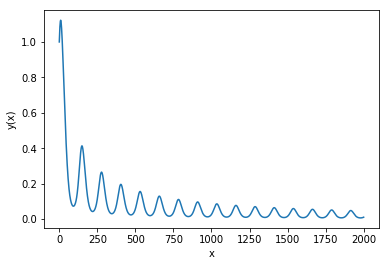

In [44]:
import matplotlib.pyplot as plt
plt.plot(vector_yi)
plt.ylabel('y(x)')
plt.xlabel('x')
plt.show()


- Iteración de Punto Fijo (Restricción: Aquí no se puede usar el método de Newton). Explique cual será su _initial guess_ y la función 'g' a utilizar. Se espera que sea convergente. <span style="color:blue; font-size: 2em"> **10 puntos**</span> 


para usar punto fijo debemos encontrar g(x).
un numero real r es punto fijo de la función si g(r)=r
algoritmo:
    xo=dato inicial
    xi+1=g(xi) for i=0,1,2,... 
    
para encontrar g(x) hay que despejar un único Yb de la ecuación que tenemos

\begin{equation*}
  \dfrac{b-a}{2}\left(y(b)\cos{(b+y(b))}+y(a)\cos{(a+y(a))}\right)-y(b)+ y(a) = 0,
\end{equation*}

\begin{equation*}
  y(b) = \dfrac{b-a}{2}\left(y(b)\cos{(b+y(b))}+y(a)\cos{(a+y(a))}\right) + y(a),
\end{equation*}

\begin{equation*}
  g(Y_{b}) = \dfrac{b-a}{2}\left(Y_{b}\cos{(b+Y_{b})}+y(a)\cos{(a+y(a))}\right) + y(a),
\end{equation*}

ahora que tenemos la función podemos iterar K veces con valores cualquiera hasta la convergencia

In [500]:
def g(a,b,ya,yb):
    return ((b-a)/2)*(yb*math.cos(b+yb)+yb*math.cos(a+ya))+ya 

def test(x):
    return math.exp(-x)

In [501]:
vector_xi = []
vector_yi = [1.0]
def prints_m(M):
    i=0
    while (i <= M):
        vector_xi.append(100.0*i/M)
        i+=1
prints_m(3.0)

# print vector_xi
# print vector_yi
K=30
x0 = 0

for i in range (K):
#     xi = test(x0)
    xi = g(vector_xi[0],vector_xi[1],1,x0)
    print xi
    x0=xi

#vamos a comprobar:
print "----------"
print x0
print g(vector_xi[0],vector_xi[1],1,x0)

1.0
-6.24455197985
-16.1222731039
-126.004453705
-1121.36247471
-19588.7288497
-5181.3674014
-2666.28404282
-66513.634464
-56034.1886009
-864325.484723
1956458.53833
-1959309.9472
12868347.0615
-9550061.2728
-176921753.135
-1654389985.63
-8086890571.86
55174360086.0
1.33060091997e+12
-4.48723787176e+12
-5.752168196e+13
-5.79429012822e+14
-1.20985452233e+16
-3.02739844137e+17
-1.55156956078e+17
9.05349013504e+17
-1.92513140945e+18
-4.41350834374e+19
1.72094283115e+20
----------
1.72094283115e+20
4.24647370163e+21



- Método de Newton. Debe explicar cual es el 'f', su derivada y el _initial guess_ a usar. <span style="color:blue; font-size: 2em"> **10 puntos**</span> 


In [502]:
x1=x0 - f(x0)/derivada de f(x0)

SyntaxError: invalid syntax (<ipython-input-502-8d828557f3f2>, line 1)

In [483]:
a = 0
ya = 1
ydera = ya * math.cos(a+ya)
b = a - ya / ydera
print b

-1.85081571768


In [503]:
vector_xi = []
vector_yi = [1.0]
def prints_m(M):
    i=0
    while (i <= M):
        vector_xi.append(100.0*i/M)
        i+=1
prints_m(3.0)

print vector_xi
print vector_yi
print "_________"

for i in range (len(vector_xi) -1):
    a  =vector_xi[i]
    ya =vector_yi[i]
    ydera = ya * math.cos(a+ya)
    b = a - ya / ydera
    print b
    

[0.0, 33.333333333333336, 66.66666666666667, 100.0]
[1.0]
_________
-1.85081571768


IndexError: list index out of range



## 2.- Implementación
Aquí usted debe implementar cada uno de los algoritmos propuestos en la pregunta anterior de la forma que los explicó. 
Usted tendrá que considerar un presupuesto $N\_budget$ de *operaciones elementales*, es decir, cada vez que en su implementación realice una operación elemental la debe descontar de su presupuesto y el algoritmo debe retornar el vector $\mathbf{y}$ de soluciones encontradas hasta donde pudo obtener una solución.
Si el presupuesto es menor a lo que necesita para poder obtener las $M\_$intervals raices, el vector debe retornar NaN en las componentes que no pudo obtener. Condicionales no se consideran operaciones elementales pero si hubieran operaciones elementales dentro de un condicional debén incluirse y descontarse del presupuesto cada vez que se realicen.
El costo de cada operación viene dado por la siguiente tabla: <br> 

|Operaciones elementales|Costo|
|:----------:|:-------------:|
| +,-,*,/ |  1 |
| Funciones Elementales (trig, etc) |    50   |

- Método de la Bisección. <span style="color:blue; font-size: 2em"> **15 puntos**</span> 

```python
'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def bisect_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    ...
    return y
```

- Iteración de Punto Fijo (Restricción: Aquí no se puede usar el método de Newton). <span style="color:blue; font-size: 2em"> **15 puntos**</span> 

```python
'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def fpi_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    ...
    return y
```

- Método de Newton. <span style="color:blue; font-size: 2em"> **15 puntos**</span> 

```python
'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def newton_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    ...
    return y
```

In [2]:
# This definitions were added now in Code mode. 
# Currently they just plot the 'sin' function but need to be modified for the homework.
# We added this so we can use the funcion 'plot_solutions_of_ODE'.
def bisect_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    x = np.linspace(0,10,M_intervals+1)
    y = np.sin(x)
    return y
def fpi_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    x = np.linspace(0,10,M_intervals+1)
    y = np.sin(x)
    return y
def newton_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    x = np.linspace(0,10,M_intervals+1)
    y = np.sin(x)
    return y

## 3.- Visualización y Conclusiones
Utilice el siguiente código para visualizar sus resultados. Se incluye esta función para que pueda visualizar sus resultados.

In [16]:
def plot_solutions_of_ODE(M_intervals=10,N_budget=1e4,log_tol=-8,shift=0.1):
    tol = 10**log_tol
    x        = np.linspace(0,10,M_intervals+1)
    y_bisec  = bisect_ode_solver(M_intervals,N_budget,tol)
    y_fpi    = fpi_ode_solver(M_intervals,N_budget,tol)
    y_newton = newton_ode_solver(M_intervals,N_budget,tol)
    plt.figure(figsize=(8,8))
    plt.plot(x,y_bisec+shift,'b-',label='Bisección: y+'+str(shift))
    plt.plot(x,y_fpi,'m-',label='FPI: y')
    plt.plot(x,y_newton-shift,'g-',label='Newton: y-'+str(shift),linewidth=3,alpha=0.5)
    plt.legend(loc='best')
    plt.title('Plot of solutions with shift for visualization purposes')
    plt.grid(True)
    plt.show()
    
interact(plot_solutions_of_ODE,M_intervals=(100,100000,100),N_budget=(100,1000000,100),log_tol=(-14,-1,1),shift=(-1,1,0.01))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMDAsIGRlc2NyaXB0aW9uPXUnTV9pbnRlcnZhbHMnLCBtYXg9MTAwMDAwLCBtaW49MTAwLCBzdGVwPTEwMCksIEludFNsaWTigKY=


<function __main__.plot_solutions_of_ODE>

- **Conclusiones**. Escriba las conclusiones de lo aprendido en su tarea, estas deben ser sustentadas con los desarrollos y experimentos numéricos realizados.  <span style="color:blue; font-size: 2em"> **15 puntos**</span> 

_Answer_

-------

# Instrucciones:

* **Importante, Asegúrese de responder TODO lo que la pregunta pide.**
* La estructura de la tarea es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Responder cada pregunta de forma personal.
     5. Referencias. Es muy importante incluir todas las fuentes usadas, de otra forma se considera que lo no se ha citado adecuadamente es su trabajo.
* La tarea debe ser realizada en `Jupyter Notebook` (`Python3`) entregado.
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `Matplotlib` y `ipywidgets`, entre otras, así como la **correcta implementación de algoritmos vectorizados**.
* **MUY IMPORTANTE** El archivo de entrega debe denominarse TareaN-rol.tar.gz y _notebook_ debe tener como nombre TareaN-rol.ipynb, donde $N$ es el número de la tarea y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados, nombre y rol del estudiante. El no cumplimiento de esta regla significa calificación $0$.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* Debe citar toda fuente de código externo. 
* El trabajo es personal, no se permite compartir código ni utilizar código de otros, aunque sí se sugiere discutir aspectos generales con sus compañeros.
* En caso de sospecha de no cumplimiento de estas instrucciones, se solicitará al involucrado o la involucrada a aclarar la situación. Dependiendo de la justificación se decidirá su calificación, la cual podrá o no ser penalizada.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

# Anexo: Pregunta Bonus <span style="color:blue"> **30 puntos**</span> 

_Los Avengers_, mientras ud. desarrollaba su solución propuesta, han estado trabajando arduamente en paralelo en un nuevo método de búsqueda de raíces que les pueda ser de ayuda.

En particular, han desarrollado un método basado en el Método de la Secante. 
Sin embargo, en lugar de buscar aproximaciones de la raíz mediante secantes trazadas desde 2 _initial guess_, **se proyecta una parábola a partir de 3 _puntos iniciales dados_**.

Para ello, se define una parábola de una forma conveniente, a partir de tres puntos $(x_0, f(x_0)), (x_1, f(x_1)),  (x_2, f(x_2))$:
\begin{align*}
f(x) = a(x - x_2)^2 + b(x - x_2) + c.
\end{align*}

Luego, se obtienen los coeficientes $a, b, c$ a partir de los 3 puntos indicados. 
Una vez definida la parábola, se elige el punto $x_3$ como **la intersección de la parábola con el eje x más cercana a $x_2$**.
A partir de $x_3$, su correspondiente $f(x_3)$ y **junto a dos puntos previos más cercanos a él** se construye una nueva parábola y se continua de la misma forma. A continuación se presenta un _sketch_ gráfico referente al método ($r$ corresponse a la aproximación de la raíz $root$), obtenida desde la parábola construida con $x_0$, $x_1$ y $x_2$.

<img src="parabola.png" style="width:50%">

Se sugiere además _poner especial cuidado a la pérdida de significancia en este algoritmo._

## B.1. Implementación

Resuelva el problema de graficar la EDO anteriormente descrita, pero esta vez utilize este algoritmo para resolver la secuencia de problemas de busqueda de raíces. Implemente el algoritmo bajo las mismas condiciones de presupuesto de operaciones elementales. Comparelo con los algoritmos anteriores y explique claramente sus ventajas y desventajas. Se sugiere modificar la función ```python plot_solutions_of_ODE ``` para incluir ```python avengers_ode_solver``` si decide libremente aceptar realizar el bonus.

```python
'''
Input: 
M_intervals - (integer) Number of intervals that the domain [0,100] will be divided.
N_budget - (integer) Budget for the number of allowed of elemental operations.
tol - (double) Tolerance for the root, it must be greater or equal to 0.
Output:
y - (double-array) The values of y(x_i) for all the values of x_i. The dimension of this vector is M+1, it must include the initial value. The vector should return NaN if it could not compute any of the values required.
'''
def avengers_ode_solver(M_intervals=10,N_budget=1e4,tol=1e-8):
    y = np.full(M_intervals+1,np.nan)
    ...
    return y
```